# 📓 MNIST Digits - EDA + PCA Compression

## 1. Introduction
In this notebook, we explore the MNIST digits dataset (28x28 grayscale images of digits 0–9).
First, we perform exploratory data analysis (EDA) to understand the structure and patterns in the data.
Then, we apply Principal Component Analysis (PCA) to compress images and visualize
how dimensionality reduction affects image quality.


In [1]:
# ## 2. Load Libraries & Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import seaborn as sns

# Load MNIST (70,000 images of 28x28 pixels)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)


Dataset shape: (70000, 784)
Target shape: (70000,)


C:\Users\ghost\AppData\Local\Temp\ipykernel_21408\1056312494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


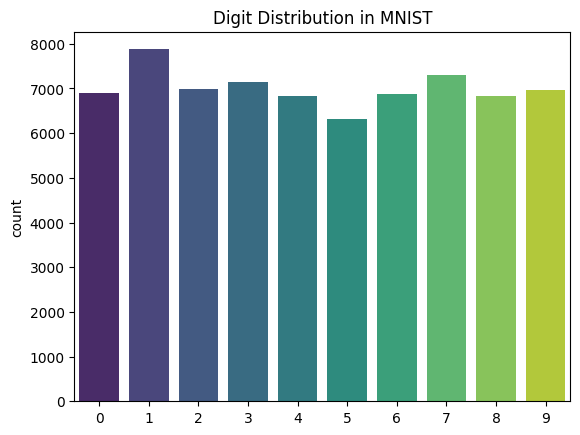

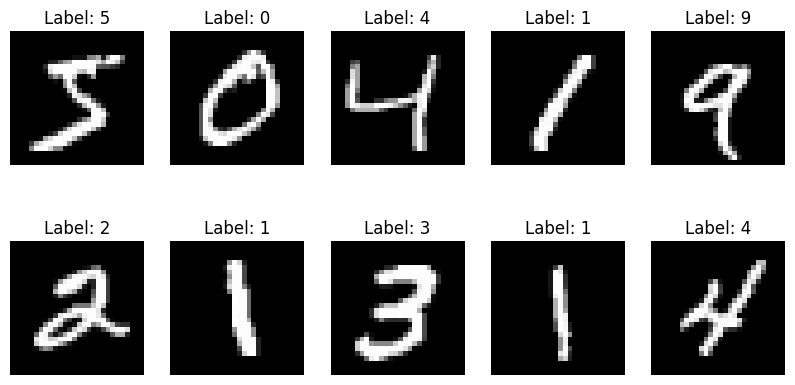

In [2]:
# ## 3. Basic EDA

# Check class balance
sns.countplot(x=y, palette="viridis")
plt.title("Digit Distribution in MNIST")
plt.show()

# Visualize a few random digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.show()


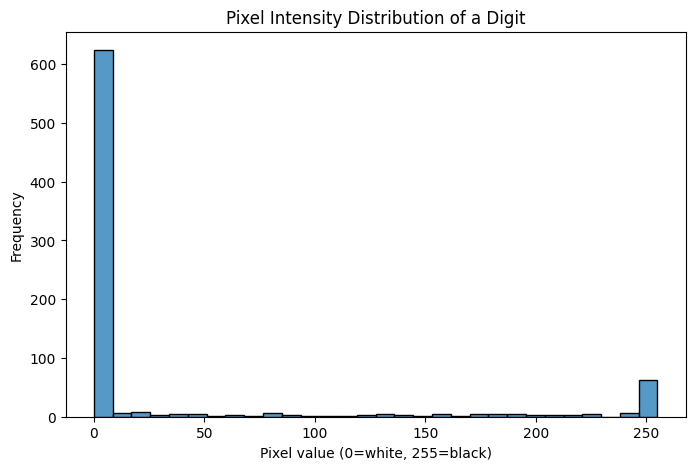

In [3]:
# ## 4. Pixel Intensity Distribution
plt.figure(figsize=(8,5))
sns.histplot(X[0], bins=30, kde=False)
plt.title("Pixel Intensity Distribution of a Digit")
plt.xlabel("Pixel value (0=white, 255=black)")
plt.ylabel("Frequency")
plt.show()


Original shape: (70000, 784)
Compressed shape: (70000, 50)


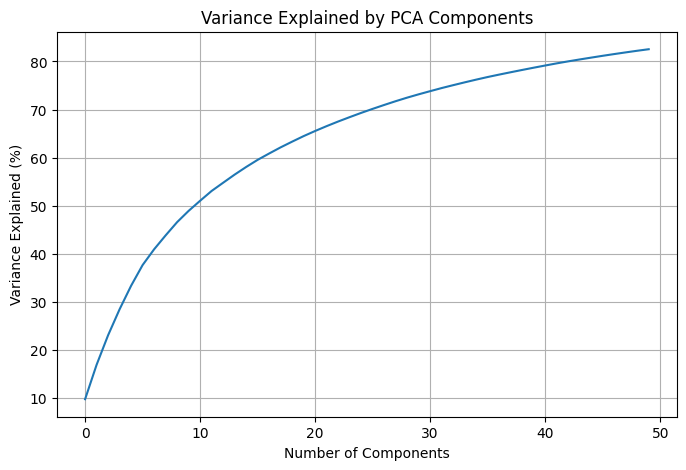

In [4]:
# ## 5. PCA for Dimensionality Reduction

# Apply PCA
pca = PCA(n_components=50)   # keep 50 components
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Compressed shape:", X_pca.shape)

# Explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained (%)")
plt.title("Variance Explained by PCA Components")
plt.grid(True)
plt.show()


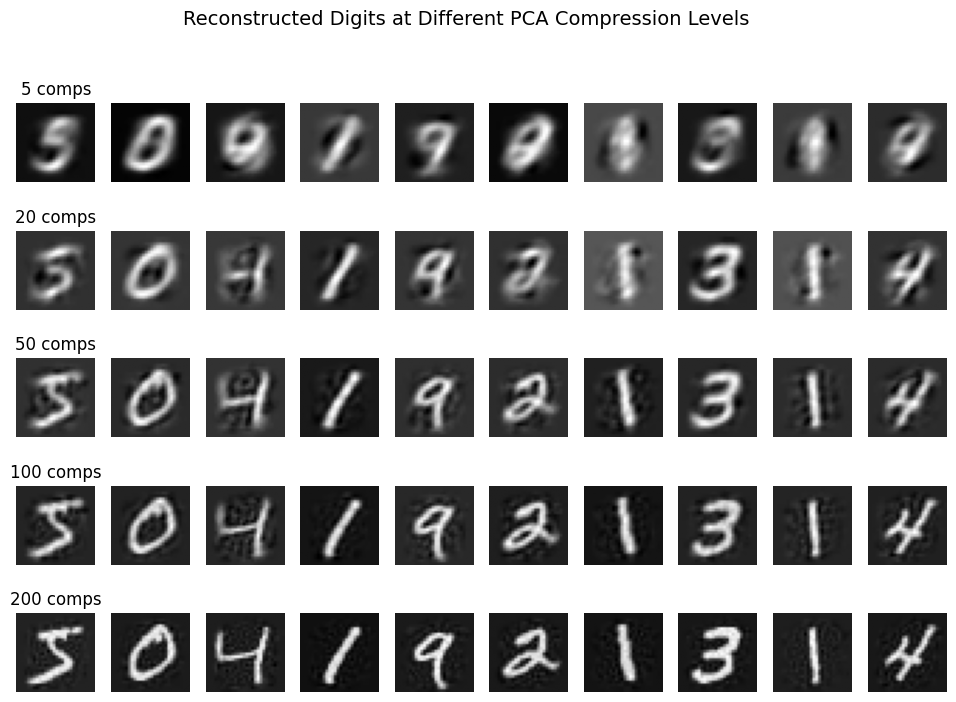

In [5]:
# ## 6. Image Reconstruction from PCA
components_list = [5, 20, 50, 100, 200]

fig, axes = plt.subplots(len(components_list), 10, figsize=(12, 8))
for i, n in enumerate(components_list):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X[:1000])      # use subset for speed
    X_reconstructed = pca.inverse_transform(X_pca)
    
    for j in range(10):
        axes[i, j].imshow(X_reconstructed[j].reshape(28, 28), cmap="gray")
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(f"{n} comps")

plt.suptitle("Reconstructed Digits at Different PCA Compression Levels", fontsize=14)
plt.show()


#  7. Final Verdict (EDA + PCA)
- Dataset: MNIST has 70k balanced grayscale digit images (28x28 = 784 pixels).
- EDA shows that most pixel values are near 0 (background) with some higher strokes.
- PCA significantly reduces dimensionality while preserving most of the structure.
- With ~150 components, we can preserve ~95% variance → huge compression from 784.
- Image quality degrades gracefully as we reduce components → PCA is powerful for compression.
